# Cargue Librerías Modelo Gradient Boosting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn               as sns
import statsmodels.api       as sm
import statsmodels.formula.api as sfm

from scipy                   import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import multiprocessing

import warnings
warnings.filterwarnings('once')

In [ ]:
icetex_predict = 'C:/Users/elkcuepa/Documents/Prejuridico/icetex_to_predict.xlsx'
icetex_predict = pd.read_excel(icetex_predict)

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [ ]:
sns.set(style='darkgrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)

In [ ]:
icetex_predict_PCA = icetex_predict.drop(columns=['IES','NOMBREPROGRAMA','APELLIDOS','NOMBRES',
                                                     'FECHAENTRADA','FECHAACTUALIZACION','FECHAMOVIMIENTO',
                                                  'FECHA_ACUERDO','FECHAENTRADA','AÑO_MES_ENTRADA', 'AÑO_MES_SALIDA',
                                                  'DIA_FREQ_ACUERDO', 'MES_FREQ_ACUERDO','año_FREQ_ACUERDO','FECHA_ACUERDO', 'ESTADO_ACUERDO',
                                                  'TIPO_ACUERDO','Dia_contactoEfectivo', 'Dia_contactoNOEfectivo',
                                                  'AÑO_MES_ENTRADA', 'AÑO_MES_SALIDA','VCTO_CUOTA1','index','SUBLINEA'], axis=1)

In [ ]:
activa = icetex_predict_PCA['LINEA'] == 'LINEA_ACTIVA'
fondos = icetex_predict_PCA['LINEA'] == 'FONDOS'
icetex_prej_activa = icetex_predict_PCA[activa]
icetex_prej_fondos = icetex_predict_PCA[fondos]

In [ ]:
icetex_predict_PCA.shape

(137816, 42)

In [ ]:
icetex_predict_PCA.to_excel('C:/Users/elkcuepa/Documents/Proyecto Modelo ICETEX pREJUR/icetex_predict_PCA.xlsx', index = False, header=True)

#CARTERA ACTIVA

# Análisis final de datos vs Tiempos de pago

## Nulos

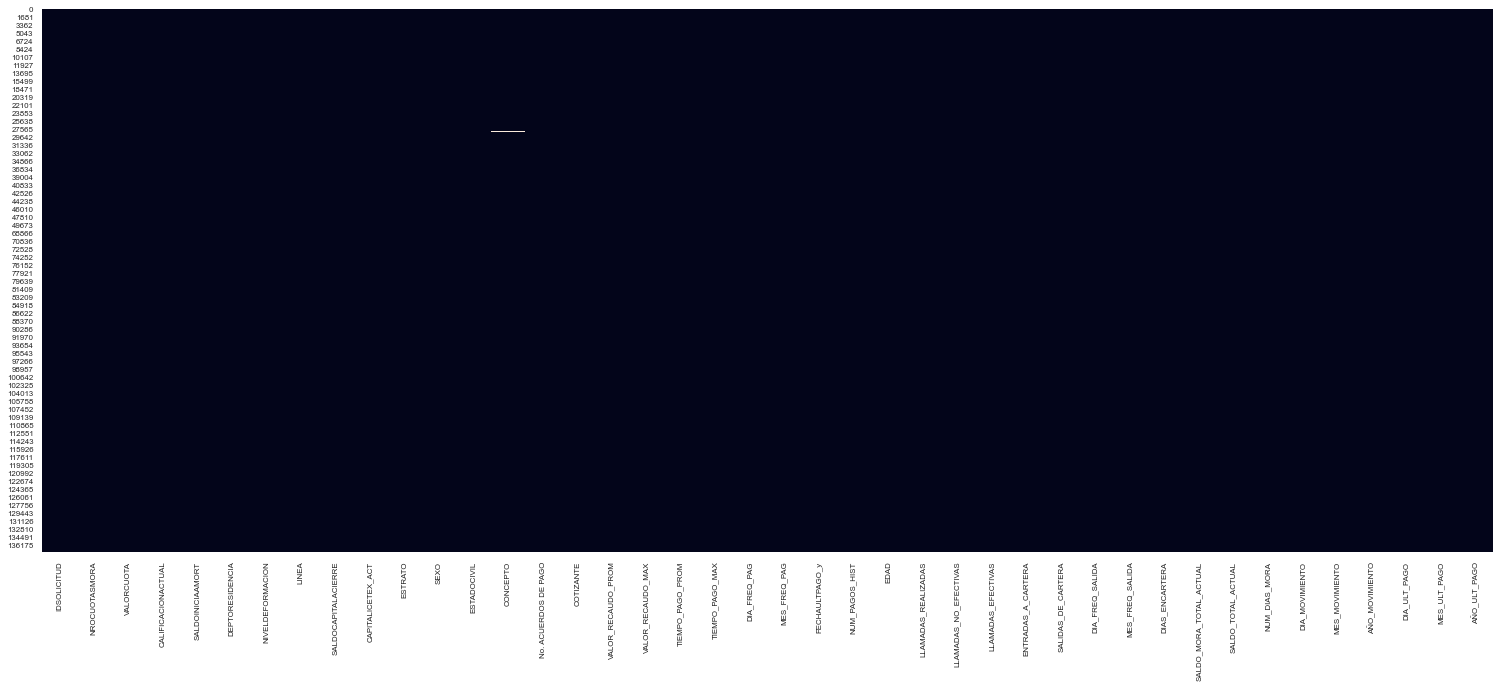

In [ ]:
plt.figure(figsize=(26, 10))
sns.heatmap(icetex_prej_activa.isnull(), cbar=False)

## Análisis outliers

In [ ]:
Q1 = icetex_prej_activa.quantile(0.25)
Q3 = icetex_prej_activa.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IDSOLICITUD                1.438640e+06
NROCUOTASMORA              2.000000e+00
VALORCUOTA                 2.081387e+05
SALDOINICIAAMORT           1.494826e+07
SALDOCAPITALACIERRE        1.334450e+07
CAPITALICETEX_ACT          1.342423e+07
ESTRATO                    1.000000e+00
No. ACUERDOS DE PAGO       2.000000e+00
VALOR_RECAUDO_PROM         3.062742e+05
VALOR_RECAUDO_MAX          9.357998e+05
TIEMPO_PAGO_PROM           5.852273e+01
TIEMPO_PAGO_MAX            1.810000e+02
DIA_FREQ_PAG               1.500000e+01
MES_FREQ_PAG               5.000000e+00
NUM_PAGOS_HIST             1.700000e+01
EDAD                       7.000000e+00
LLAMADAS_REALIZADAS        8.000000e+00
LLAMADAS_NO_EFECTIVAS      4.000000e+00
LLAMADAS_EFECTIVAS         4.000000e+00
ENTRADAS_A_CARTERA         3.000000e+00
SALIDAS_DE_CARTERA         2.000000e+00
DIA_FREQ_SALIDA            1.600000e+01
MES_FREQ_SALIDA            6.000000e+00
DIAS_ENCARTERA             4.700000e+01
SALDO_MORA_TOTAL_ACTUAL    1.201894e+06


In [ ]:
icetex_activa_out = icetex_prej_activa[(np.abs(stats.zscore(icetex_prej_activa['TIEMPO_PAGO_PROM']))<2)]   

In [ ]:
icetex_activa_out.shape

(109762, 42)

# Análisis PCA Matriz definitiva

## Dummies Variables Categóricas 

In [ ]:
icetex_activa_out['ESTRATO']=icetex_activa_out['ESTRATO'].astype(str)

<ipython-input-12-7f34372876a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icetex_activa_out['ESTRATO']=icetex_activa_out['ESTRATO'].astype(str)


In [ ]:
icetex_predict_out1 = icetex_activa_out.drop(columns=['IDSOLICITUD','FECHAULTPAGO_y'])

In [ ]:
features = pd.DataFrame(icetex_predict_out1.dtypes)
features.columns = ['type']
features_f = icetex_predict_out1.select_dtypes(include=['float64', 'int']).columns
features_o = icetex_predict_out1.select_dtypes(include=['object']).columns

In [ ]:
df_onehot = pd.get_dummies(icetex_predict_out1, columns=features_o)
df_onehot

,NROCUOTASMORA,VALORCUOTA,SALDOINICIAAMORT,SALDOCAPITALACIERRE,CAPITALICETEX_ACT,No. ACUERDOS DE PAGO,VALOR_RECAUDO_PROM,VALOR_RECAUDO_MAX,TIEMPO_PAGO_PROM,TIEMPO_PAGO_MAX,...,ESTADOCIVIL_SOLTERO(A),ESTADOCIVIL_UNIÓN LIBRE,ESTADOCIVIL_VIUDO(A),CONCEPTO_BABY_BOOMERS,CONCEPTO_GENERACION_SILENCIOSA,CONCEPTO_GENERACION_X,CONCEPTO_GENERACION_Y,CONCEPTO_GENERACION_Z,COTIZANTE_NO,COTIZANTE_SI
0,3.0,248112.0,24689007.00,7810639.00,7810638.88,2,2.291361e+05,1000000.0,25.473684,155.0,...,0,0,0,0,0,0,1,0,0,1
1,5.0,124790.0,26125472.77,10838633.17,10644320.14,1,1.608809e+05,321000.0,40.760000,194.0,...,1,0,0,0,0,0,1,0,0,1
2,3.0,315817.0,30243848.09,9154011.67,9154011.67,5,6.182182e+05,1420271.0,90.090909,283.0,...,1,0,0,0,0,0,1,0,0,1
3,5.0,364407.0,40708635.00,13400215.00,11647451.77,6,1.237937e+06,2985994.0,85.153846,184.0,...,1,0,0,0,0,0,1,0,1,0
4,3.0,595971.0,64120343.75,45763167.32,45763167.32,8,4.658957e+05,1100423.0,43.647059,113.0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137811,2.0,259266.0,0.00,5007000.00,5007000.00,0,4.386600e+05,1193666.2,67.419827,258.6,...,0,0,0,0,0,0,0,1,1,0
137812,3.0,274332.0,0.00,7967432.00,7967432.00,0,4.386600e+05,1193666.2,64.499827,182.2,...,1,0,0,0,0,0,0,1,1,0
137813,3.0,174200.0,0.00,3446300.00,3446300.00,0,4.386600e+05,1193666.2,56.466886,180.4,...,0,0,0,0,0,0,0,1,1,0
137814,3.0,637473.0,0.00,11712767.00,11712767.07,0,8.836930e+05,883693.0,105.176970,176.2,...,0,0,0,0,0,0,1,0,1,0


## Estandarización Variables

In [ ]:
Estandar = StandardScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,109762.0,0.0,1.0,-1.23,-0.54,-0.20,0.14,23.76
1,109762.0,-0.0,1.0,-1.54,-0.46,-0.20,0.19,78.81
2,109762.0,-0.0,1.0,-0.83,-0.83,-0.27,0.37,8.51
3,109762.0,0.0,1.0,-1.03,-0.67,-0.30,0.33,10.79
4,109762.0,0.0,1.0,-1.18,-0.67,-0.30,0.33,12.52
...,...,...,...,...,...,...,...,...
109,109762.0,0.0,1.0,-0.24,-0.24,-0.24,-0.24,4.15
110,109762.0,0.0,1.0,-0.94,-0.94,-0.94,1.06,1.06
111,109762.0,0.0,1.0,-0.93,-0.93,-0.93,1.07,1.07
112,109762.0,-0.0,1.0,-3.22,0.31,0.31,0.31,0.31


In [ ]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))
print(autovalores)

[ 5.03290101e+05  4.26851776e+05  3.38929295e+05  3.30497221e+05
  2.58132285e+05  2.38064143e+05  2.14482553e+05  2.01574943e+05
  1.93489410e+05  1.81884220e+05  1.71592070e+05  1.72756140e+05
  1.65870740e+05  1.62266777e+05  1.30360028e+04  2.59053665e+04
  2.84426678e+04  3.08535400e+04  3.59180178e+04  1.52963794e+05
  3.95965831e+04  3.88081251e+04  4.27534756e+04  5.09507491e+04
  1.77497428e+03  5.63403334e+04  6.01808074e+04  1.46056063e+05
  1.42937418e+05  1.20773204e+03  6.50920644e+04  6.79005267e+04
  6.87257466e+04  6.75866666e+02  7.35130425e+04  1.39468833e+05
  3.98126954e+02  7.80547997e+04  8.25557752e+04  8.49872859e+04
  8.86539453e+04  1.29793330e+05  8.96582740e+04  1.27224502e+05
  1.25673759e+05  9.48432665e+04  9.66448829e+04  1.24048323e+05
  1.23622336e+05  1.21896296e+05  9.86913168e+04  1.20998833e+05
  9.90717198e+04  1.19019678e+05  1.01425313e+05  1.02014950e+05
  1.18534265e+05  1.18436187e+05  1.17886608e+05  1.02987181e+05
  1.16949783e+05  1.04216

## Ejecución PCA 

In [ ]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores
PCA = PCA.sort_values(by=('Autovalor'), ascending=False)
PCA.head(20)

,Variable,Autovalor
0,NROCUOTASMORA,503290.100605
1,VALORCUOTA,426851.775768
2,SALDOINICIAAMORT,338929.295413
3,SALDOCAPITALACIERRE,330497.220913
4,CAPITALICETEX_ACT,258132.285385
5,No. ACUERDOS DE PAGO,238064.142942
6,VALOR_RECAUDO_PROM,214482.553297
7,VALOR_RECAUDO_MAX,201574.942939
8,TIEMPO_PAGO_PROM,193489.409560
9,TIEMPO_PAGO_MAX,181884.220412


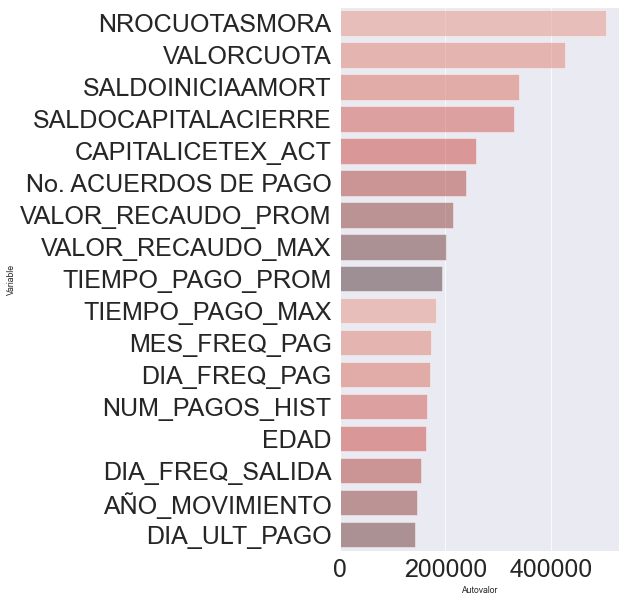

In [ ]:
PCA1 = PCA.head(17)
fig, ax = plt.subplots(figsize = (5, 10))
b=sns.barplot(data=PCA1, x='Autovalor', y='Variable', alpha=0.5,
            palette=sns.color_palette("Reds_d", n_colors=9, desat=1),
            )
b.tick_params(labelsize=25)
plt.show()

## Selección variables de estudio Modelo

In [ ]:
icetex_matriz_activa = df_onehot[['NROCUOTASMORA', 'VALORCUOTA',  'SALDOINICIAAMORT', 'SALDOCAPITALACIERRE',
                           'CAPITALICETEX_ACT','TIEMPO_PAGO_MAX', 'No. ACUERDOS DE PAGO', 'VALOR_RECAUDO_PROM', 'VALOR_RECAUDO_MAX',
                           'TIEMPO_PAGO_PROM', 'DIA_FREQ_PAG', 'MES_FREQ_PAG', 'NUM_PAGOS_HIST',
                            'SALDO_MORA_TOTAL_ACTUAL','SALDO_TOTAL_ACTUAL',
                            'MES_FREQ_SALIDA','EDAD','DIA_ULT_PAGO']]

#CARTERA FONDOS

# Análisis final de datos vs Tiempos de pago

## Nulos

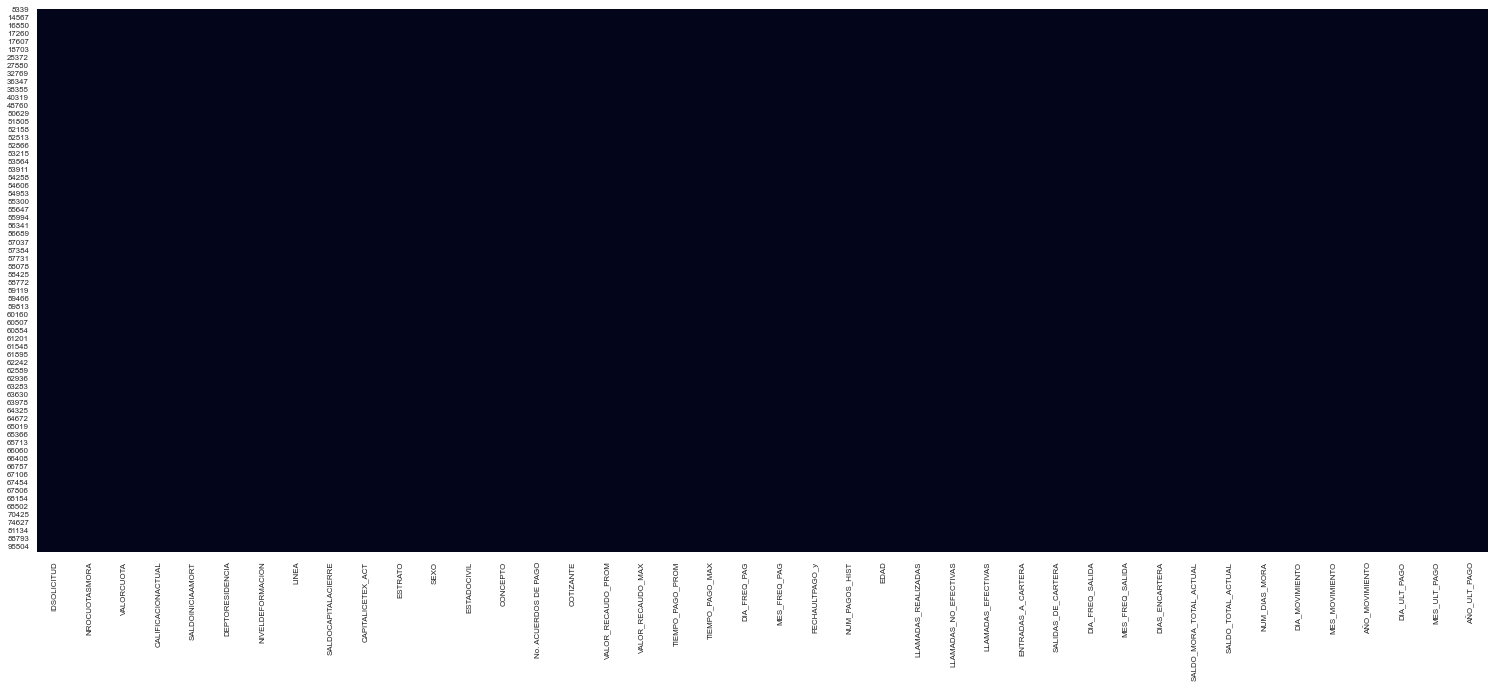

In [ ]:
plt.figure(figsize=(26, 10))
sns.heatmap(icetex_prej_fondos.isnull(), cbar=False)

## Análisis outliers

In [ ]:
Q1 = icetex_prej_fondos.quantile(0.25)
Q3 = icetex_prej_fondos.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IDSOLICITUD                1.615525e+04
NROCUOTASMORA              2.000000e+00
VALORCUOTA                 1.521300e+05
SALDOINICIAAMORT           4.843161e+06
SALDOCAPITALACIERRE        4.185139e+06
CAPITALICETEX_ACT          3.508942e+06
ESTRATO                    1.000000e+00
No. ACUERDOS DE PAGO       0.000000e+00
VALOR_RECAUDO_PROM         0.000000e+00
VALOR_RECAUDO_MAX          0.000000e+00
TIEMPO_PAGO_PROM           2.133619e+01
TIEMPO_PAGO_MAX            6.200000e+01
DIA_FREQ_PAG               0.000000e+00
MES_FREQ_PAG               4.000000e-01
NUM_PAGOS_HIST             0.000000e+00
EDAD                       0.000000e+00
LLAMADAS_REALIZADAS        6.000000e+00
LLAMADAS_NO_EFECTIVAS      4.000000e+00
LLAMADAS_EFECTIVAS         1.000000e+00
ENTRADAS_A_CARTERA         2.000000e+00
SALIDAS_DE_CARTERA         2.000000e+00
DIA_FREQ_SALIDA            0.000000e+00
MES_FREQ_SALIDA            0.000000e+00
DIAS_ENCARTERA             0.000000e+00
SALDO_MORA_TOTAL_ACTUAL    4.919703e+06


In [ ]:
icetex_prej_fondos = icetex_prej_fondos[(np.abs(stats.zscore(icetex_prej_fondos['TIEMPO_PAGO_PROM']))<2)]   

In [ ]:
icetex_prej_fondos.shape

(22617, 42)

# Análisis PCA Matriz definitiva

## Dummies Variables Categóricas 

In [ ]:
icetex_prej_fondos['ESTRATO']=icetex_prej_fondos['ESTRATO'].astype(str)

<ipython-input-25-986a99518b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icetex_prej_fondos['ESTRATO']=icetex_prej_fondos['ESTRATO'].astype(str)


In [ ]:
icetex_predict_out2 = icetex_prej_fondos.drop(columns=['IDSOLICITUD','FECHAULTPAGO_y'])

In [ ]:
features = pd.DataFrame(icetex_predict_out2.dtypes)
features.columns = ['type']
features_f = icetex_predict_out2.select_dtypes(include=['float64', 'int']).columns
features_o = icetex_predict_out2.select_dtypes(include=['object']).columns

In [ ]:
df_onehot2 = pd.get_dummies(icetex_predict_out2, columns=features_o)
df_onehot2

,NROCUOTASMORA,VALORCUOTA,SALDOINICIAAMORT,SALDOCAPITALACIERRE,CAPITALICETEX_ACT,No. ACUERDOS DE PAGO,VALOR_RECAUDO_PROM,VALOR_RECAUDO_MAX,TIEMPO_PAGO_PROM,TIEMPO_PAGO_MAX,...,ESTADOCIVIL_SOLTERO(A),ESTADOCIVIL_UNIÓN LIBRE,ESTADOCIVIL_VIUDO(A),CONCEPTO_BABY_BOOMERS,CONCEPTO_GENERACION_SILENCIOSA,CONCEPTO_GENERACION_X,CONCEPTO_GENERACION_Y,CONCEPTO_GENERACION_Z,COTIZANTE_NO,COTIZANTE_SI
8339,55.0,1438727.50,8.975481e+07,8.805425e+07,8.805425e+07,2,4.386600e+05,1193666.2,55.265981,213.2,...,1,0,0,0,0,0,1,0,0,1
8341,25.0,1737973.89,1.314982e+08,1.314982e+08,1.314982e+08,0,4.386600e+05,1193666.2,125.419827,232.2,...,1,0,0,0,0,0,1,0,1,0
8342,1.0,3532544.00,2.494418e+07,2.447400e+07,2.447400e+07,0,4.386600e+05,1193666.2,57.778160,227.4,...,0,0,0,0,0,0,1,0,0,1
8343,36.0,3121.39,6.497683e+04,6.497683e+04,0.000000e+00,2,1.122270e+05,112227.0,152.497619,254.6,...,1,0,0,0,0,0,1,0,1,0
8344,36.0,4471.33,9.307000e+04,9.307000e+04,9.307000e+04,0,4.010190e+05,1191779.2,55.257922,211.6,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131991,5.0,294085.00,1.000000e+07,1.000000e+07,8.547142e+06,1,1.086488e+06,1672977.0,95.000000,95.0,...,0,0,0,0,0,0,0,1,1,0
132458,3.0,207927.00,2.445300e+06,2.245757e+06,2.051044e+06,0,2.594815e+05,400000.0,61.666667,138.0,...,1,0,0,0,0,0,0,1,1,0
134642,3.0,268783.49,3.161000e+06,2.642750e+06,2.642750e+06,0,2.743915e+05,280000.0,94.000000,94.0,...,0,0,0,0,0,0,0,1,0,1
134992,2.0,141822.00,1.603069e+06,9.522656e+05,9.522656e+05,3,3.666667e+05,400000.0,121.500000,215.0,...,1,0,0,0,0,0,0,1,1,0


## Estandarización Variables

In [ ]:
Estandar = StandardScaler()
Estandar.fit(df_onehot2)

df_std2 = Estandar.transform(df_onehot2)
df_std2 = pd.DataFrame(df_std2)
round(df_std2.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,22617.0,0.0,1.0,-1.47,-0.42,-0.42,-0.25,5.14
1,22617.0,0.0,1.0,-0.31,-0.31,-0.31,0.09,51.08
2,22617.0,0.0,1.0,-0.43,-0.41,-0.35,-0.04,37.07
3,22617.0,0.0,1.0,-0.45,-0.40,-0.34,-0.06,28.66
4,22617.0,0.0,1.0,-0.40,-0.38,-0.33,-0.07,30.10
...,...,...,...,...,...,...,...,...
102,22617.0,0.0,1.0,-0.22,-0.22,-0.22,-0.22,4.46
103,22617.0,-0.0,1.0,-2.91,0.34,0.34,0.34,0.34
104,22617.0,-0.0,1.0,-0.21,-0.21,-0.21,-0.21,4.67
105,22617.0,0.0,1.0,-1.89,0.53,0.53,0.53,0.53


In [ ]:
autovalores, autovectores = np.linalg.eig(df_std2.T.dot(df_std2))
print(autovalores)

[ 2.35686267e+05+0.00000000e+00j  1.09111002e+05+0.00000000e+00j
  7.75900311e+04+0.00000000e+00j  7.20573360e+04+0.00000000e+00j
  5.93652876e+04+0.00000000e+00j  4.91754186e+04+0.00000000e+00j
  4.67131349e+04+0.00000000e+00j  4.19248115e+04+0.00000000e+00j
  3.90707565e+04+0.00000000e+00j  3.69257321e+04+0.00000000e+00j
  3.67962095e+04+0.00000000e+00j  3.46962925e+04+0.00000000e+00j
  3.32660490e+04+0.00000000e+00j  3.52822016e+03+0.00000000e+00j
  4.24575589e+03+0.00000000e+00j  5.41405843e+03+0.00000000e+00j
  4.94281770e+03+0.00000000e+00j  2.12515800e+03+0.00000000e+00j
  3.13019537e+03+0.00000000e+00j  6.31076464e+03+0.00000000e+00j
  6.47173822e+03+0.00000000e+00j  8.20368539e+03+0.00000000e+00j
  6.95684189e+03+0.00000000e+00j  7.57387821e+03+0.00000000e+00j
  1.41283102e+03+0.00000000e+00j  7.34128012e+03+0.00000000e+00j
  1.02984544e+04+0.00000000e+00j  2.98598571e+04+0.00000000e+00j
  1.09621034e+04+0.00000000e+00j  1.13374087e+04+0.00000000e+00j
  1.21763573e+04+0.000000

## Ejecución PCA 

In [ ]:
PCA2 = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA2['Variable'] = df_onehot2.columns
PCA2['Autovalor'] = autovalores
PCA2 = PCA2.sort_values(by=('Autovalor'), ascending=False)
PCA2.head(20)

,Variable,Autovalor
0,NROCUOTASMORA,235686.267298+0.000000j
1,VALORCUOTA,109111.001973+0.000000j
2,SALDOINICIAAMORT,77590.031086+0.000000j
3,SALDOCAPITALACIERRE,72057.335985+0.000000j
4,CAPITALICETEX_ACT,59365.287612+0.000000j
5,No. ACUERDOS DE PAGO,49175.418616+0.000000j
6,VALOR_RECAUDO_PROM,46713.134924+0.000000j
7,VALOR_RECAUDO_MAX,41924.811482+0.000000j
8,TIEMPO_PAGO_PROM,39070.756493+0.000000j
9,TIEMPO_PAGO_MAX,36925.732144+0.000000j


## Selección variables de estudio Modelo

In [ ]:
icetex_matriz_fondos = df_onehot2[['NROCUOTASMORA', 'VALORCUOTA',  'SALDOINICIAAMORT', 'SALDOCAPITALACIERRE',
                           'CAPITALICETEX_ACT','TIEMPO_PAGO_MAX', 'No. ACUERDOS DE PAGO', 'VALOR_RECAUDO_PROM', 'VALOR_RECAUDO_MAX',
                           'TIEMPO_PAGO_PROM', 'DIA_FREQ_PAG', 'MES_FREQ_PAG', 'NUM_PAGOS_HIST',
                            'SALDO_MORA_TOTAL_ACTUAL','SALDO_TOTAL_ACTUAL',
                            'MES_FREQ_SALIDA','EDAD','DIA_ULT_PAGO']]

# Modelado Grading Boosting

## Modelo Inicial

In [ ]:
X_train_gb1, X_test_gb1, y_train_gb1, y_test_gb1 = train_test_split(
                                        icetex_matriz_fondos.drop(columns = "TIEMPO_PAGO_PROM"),
                                        icetex_matriz_fondos['TIEMPO_PAGO_PROM'],
                                        random_state = 123
                                    )
Estandar = StandardScaler()
Estandar.fit(X_train_gb1)

X_train_gb1 = Estandar.transform(X_train_gb1)
X_test_gb1 = Estandar.transform(X_test_gb1)

In [ ]:
modelo_prej_2 = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )

modelo_prej_2.fit(X_train_gb1, y_train_gb1)

GradientBoostingRegressor(max_features='auto', n_estimators=10,
                          random_state=123)

In [ ]:
predicciones = modelo_prej_2.predict(X = X_test_gb1)

rmse = mean_squared_error(
        y_true  = y_test_gb1,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 14.212749046203669


## Evaluación n-estimators

Valor óptimo de n_estimators: 476


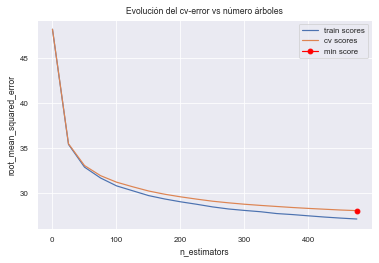

In [ ]:
train_scores = []
cv_scores    = []


estimator_range = range(1, 480, 25)


for n_estimators in estimator_range:
    
    modelo_prej_2 = GradientBoostingRegressor(
                n_estimators = n_estimators,
                loss         = 'ls',
                max_features = 'auto',
                random_state = 123
             )
    
    # Error de train
    modelo_prej_2.fit(X_train_gb, y_train_gb)
    predicciones = modelo_prej_2.predict(X = X_train_gb)
    rmse = mean_squared_error(
            y_true  = y_train_gb,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo_prej_2,
                X         = X_train_gb,
                y         = y_train_gb,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1,
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

## Evaluación Learning rate

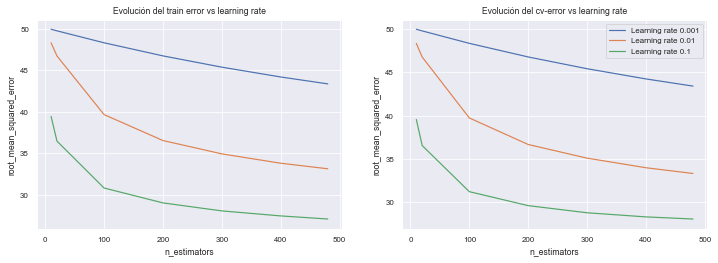

In [ ]:

resultados = {}


learning_rates = [0.001, 0.01, 0.1]
n_estimators   = [10,20,100, 200, 300, 400, 480]


for learning_rate in learning_rates:
    train_scores = []
    cv_scores    = []
    
    for n_estimator in n_estimators:
    
        modelo_prej_2 = GradientBoostingRegressor(
                    n_estimators  = n_estimator,
                    learning_rate = learning_rate,
                    loss          = 'ls',
                    max_features  = 'auto',
                    random_state  = 123
                 )

        
        modelo_prej_2.fit(X_train_gb, y_train_gb)
        predicciones = modelo_prej_2.predict(X = X_train_gb)
        rmse = mean_squared_error(
                y_true  = y_train_gb,
                y_pred  = predicciones,
                squared = False
               )
        train_scores.append(rmse)

       
        scores = cross_val_score(
                    estimator = modelo_prej_2,
                    X         = X_train_gb,
                    y         = y_train_gb,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 3,
                    n_jobs    = multiprocessing.cpu_count() - 1
                 )
        
        cv_scores.append(-1*scores.mean())
        
    resultados[learning_rate] = {'train_scores': train_scores, 'cv_scores': cv_scores}


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.84))

for key, value in resultados.items():
    axs[0].plot(n_estimators, value['train_scores'], label=f"Learning rate {key}")
    axs[0].set_ylabel("root_mean_squared_error")
    axs[0].set_xlabel("n_estimators")
    axs[0].set_title("Evolución del train error vs learning rate")
    
    axs[1].plot(n_estimators, value['cv_scores'], label=f"Learning rate {key}")
    axs[1].set_ylabel("root_mean_squared_error")
    axs[1].set_xlabel("n_estimators")
    axs[1].set_title("Evolución del cv-error vs learning rate")
    plt.legend();

## Evaluación profundidad árboles

Valor óptimo de max_depth: 10


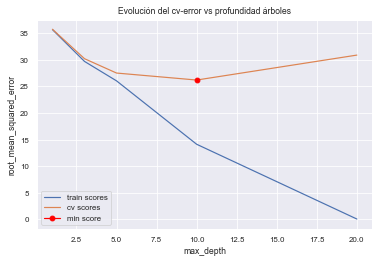

In [ ]:

train_scores = []
cv_scores    = []

max_depths = [1, 3, 5, 10, 20]

for max_depth in max_depths:
    
    modelo_prej_2 = GradientBoostingRegressor(
                n_estimators = 150,
                loss         = 'ls',
                max_depth    = max_depth,
                max_features = 'auto',
                random_state = 123
             )
    
   
    modelo_prej_2.fit(X_train_gb, y_train_gb)
    predicciones = modelo_prej_2.predict(X = X_train_gb)
    rmse = mean_squared_error(
            y_true  = y_train_gb,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    
    scores = cross_val_score(
                estimator = modelo_prej_2,
                X         = X_train_gb,
                y         = y_train_gb,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1
             )
    
    cv_scores.append(-1*scores.mean())
    

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_depths, train_scores, label="train scores")
ax.plot(max_depths, cv_scores, label="cv scores")
ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_depth")
ax.set_title("Evolución del cv-error vs profundidad árboles")
plt.legend();
print(f"Valor óptimo de max_depth: {max_depths[np.argmin(cv_scores)]}")

## Evaluación Hiperparámetros

In [ ]:

param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }


grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(
                        n_estimators        = 480, 
                        random_state        = 123,                    
                        validation_fraction = 0.1,
                        n_iter_no_change    = 5,
                        tol                 = 0.0001
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_gb, y = y_train_gb)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_max_depth,param_max_features,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
54,0.01,10,auto,0.5,-26.694689,0.130716,-19.408465,0.071988
85,0.1,10,auto,1,-26.702768,0.113305,-14.624892,0.082078
89,0.1,10,log2,1,-26.808844,0.111418,-15.116401,0.356800
87,0.1,10,sqrt,1,-26.808844,0.111418,-15.116401,0.356800


In [ ]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.01, 'max_depth': 10, 'max_features': 'auto', 'subsample': 0.5} : -26.69468935432595 neg_root_mean_squared_error


In [ ]:
print(f"Número de árboles del modelo: {grid.best_estimator_.n_estimators_}")

Número de árboles del modelo: 480


## Error Modelo Final

In [ ]:
modelo_gb = grid.best_estimator_
predicciones_gb = modelo_gb.predict(X = X_test_gb)
rmse_gb = mean_squared_error(
        y_true  = y_test_gb,
        y_pred  = predicciones_gb,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_gb}")

El error (rmse) de test es: 26.43285185636012


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


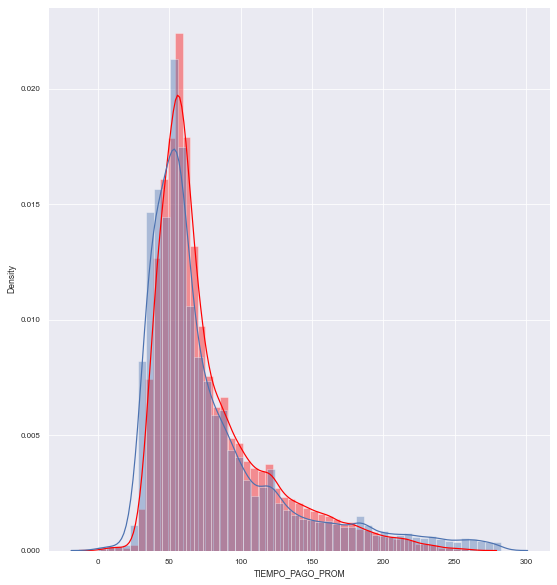

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))
sns.distplot(predicciones_gb, color ='red', label = 'Valor Predecido')
sns.distplot(y_test_gb, label = 'Valor Actual')

In [ ]:
df_predicciones = pd.DataFrame({'Tiempo_PAGO_REAL' : y_test_gb, 'PREDICCION_PAGO' : predicciones_gb})
df_predicciones.head()

,Tiempo_PAGO_REAL,PREDICCION_PAGO
6084,40.966667,38.736182
116304,137.333333,98.134903
120646,43.100000,57.386295
113921,235.533333,231.445155
50093,122.419827,121.488113


In [ ]:
errors = abs(predicciones_gb - y_test_gb)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors/y_test_gb)
accuracy = 100 - (mape.median())
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 16.41 degrees.
Accuracy: 85.82 %.


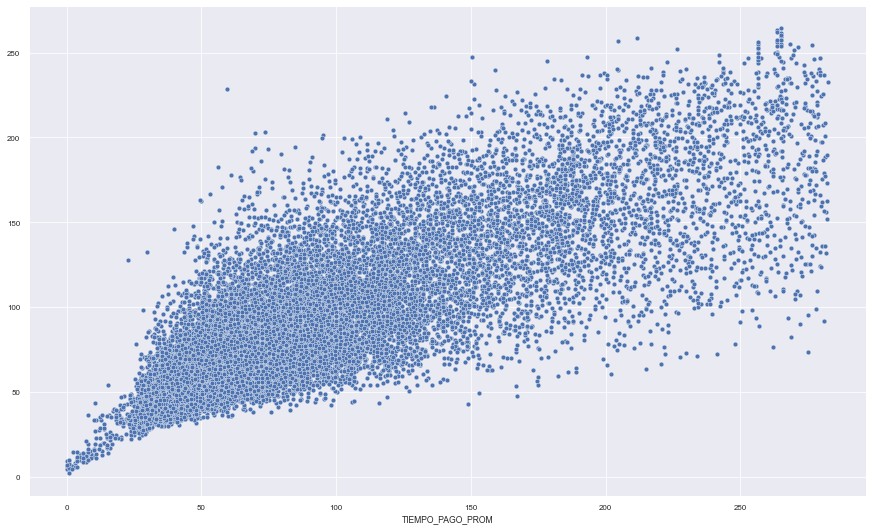

In [ ]:
fig, ax = plt.subplots(figsize = (15, 9))
sns.scatterplot(x = y_test_gb, y= predicciones_gb, legend="full")

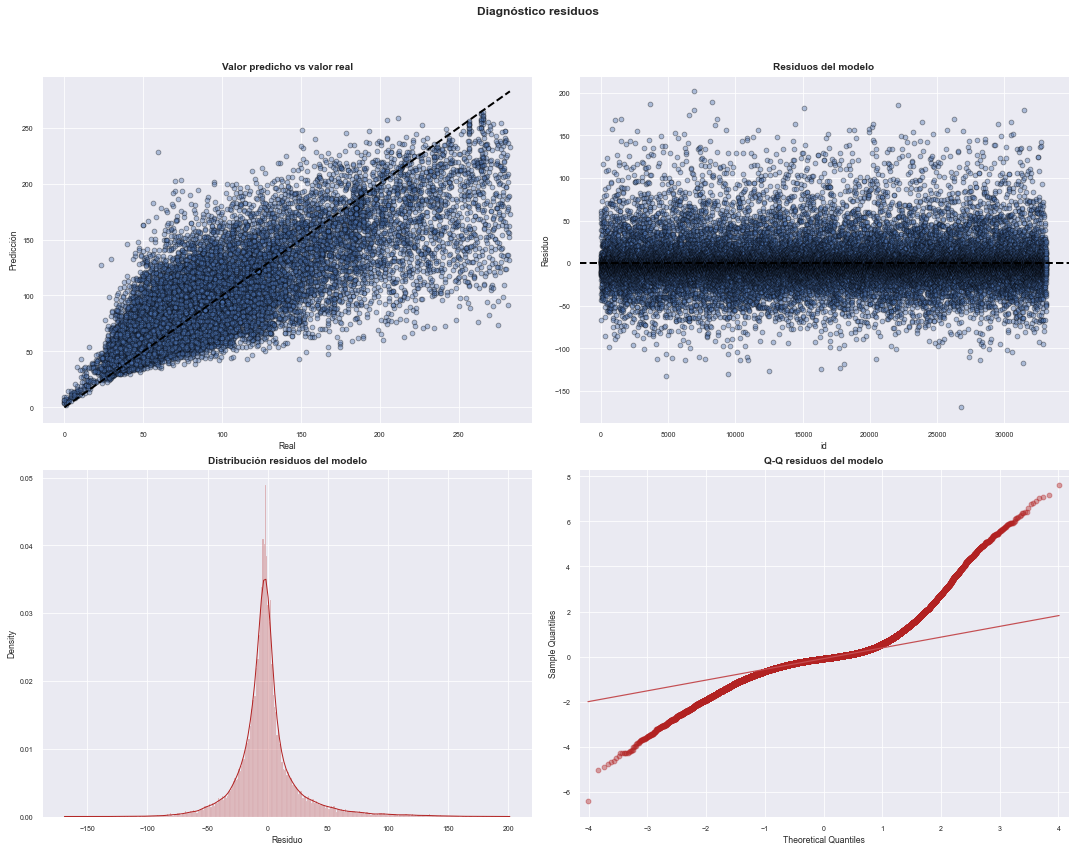

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

axes[0, 0].scatter(y_test_gb, predicciones_gb, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test_gb.min(), y_test_gb.max()], [y_test_gb.min(), y_test_gb.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test_gb))), y_test_gb - predicciones_gb,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_test_gb - predicciones_gb,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_test_gb - predicciones_gb,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## Importancia predictores

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': icetex_modelo2.drop(columns = "TIEMPO_PAGO_PROM").columns,
                             'importancia': modelo_gb.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,TIEMPO_PAGO_MAX,0.400976
8,VALOR_RECAUDO_MAX,0.134267
7,VALOR_RECAUDO_PROM,0.128866
1,VALORCUOTA,0.059061
2,SALDOINICIAAMORT,0.041816
9,DIA_FREQ_PAG,0.030947
12,SALDO_MORA_TOTAL_ACTUAL,0.030031
13,SALDO_TOTAL_ACTUAL,0.029602
3,SALDOCAPITALACIERRE,0.022742
4,CAPITALICETEX_ACT,0.022574


In [ ]:
importancia = permutation_importance(
                estimator    = modelo_gb,
                X            = X_train_gb,
                y            = y_train_gb,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = icetex_modelo2.drop(columns = "TIEMPO_PAGO_PROM").columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
5,29.791114,0.074011,TIEMPO_PAGO_MAX
7,24.927607,0.076301,VALOR_RECAUDO_PROM
8,16.411902,0.022858,VALOR_RECAUDO_MAX
1,5.334330,0.044534,VALORCUOTA
2,4.565763,0.029865,SALDOINICIAAMORT
6,2.718674,0.030109,No. ACUERDOS DE PAGO
9,2.556073,0.041651,DIA_FREQ_PAG
13,2.451918,0.011854,SALDO_TOTAL_ACTUAL
12,1.741118,0.018443,SALDO_MORA_TOTAL_ACTUAL
10,1.715001,0.024821,MES_FREQ_PAG


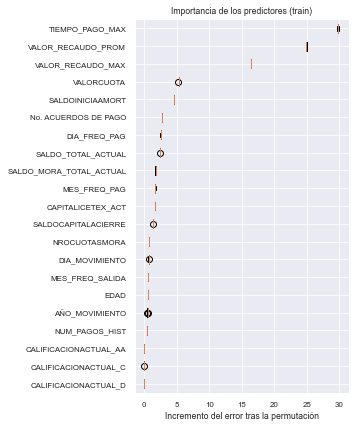

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))

sorted_idx = importancia.importances_mean.argsort()
ax.boxplot(
        importancia.importances[sorted_idx].T,
        vert   = False,
        labels = icetex_modelo2.drop(columns = "TIEMPO_PAGO_PROM").columns[sorted_idx]
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación')
fig.tight_layout();

# Modelo xgboost Cartera Activa

In [ ]:
from xgboost import XGBRegressor

## Modelo Inicial

In [ ]:
X_train_xg1, X_test_xg1, y_train_xg1, y_test_xg1 = train_test_split(
                                        icetex_matriz_activa.drop(columns = "TIEMPO_PAGO_PROM"),
                                        icetex_matriz_activa['TIEMPO_PAGO_PROM'],
                                        random_state = 123
                                    )
Estandar = StandardScaler()
Estandar.fit(X_train_xg1)

X_train_xg1 = Estandar.transform(X_train_xg1)
X_test_xg1 = Estandar.transform(X_test_xg1)

In [ ]:
X_train_xg1

array([[-0.54181671, -0.18354919, -0.82653003, ...,  0.12154447,
        -0.94809735,  1.55551363],
       [-0.20089474, -0.17190876,  0.10051259, ...,  1.0614551 ,
         0.40392635,  1.4540669 ],
       [-0.88273869, -0.30490245, -0.67424687, ...,  1.0614551 ,
         0.40392635,  1.4540669 ],
       ...,
       [-0.20089474, -0.69734883, -0.59757091, ...,  1.0614551 ,
         0.55415121, -1.28499477],
       [ 0.48094921,  0.60958976,  2.89041911, ...,  0.74815155,
        -0.34719793,  0.84538653],
       [-0.20089474, -0.50747774, -0.22336494, ...,  0.12154447,
         0.55415121, -0.87920786]])

In [ ]:
X_train1 = pd.DataFrame(X_train_xg1)
y_train1 = pd.DataFrame(y_train_xg1)

## Evaluación Hiperparámetros por GridSearch

In [ ]:

param_grid = {'max_depth'        : [None, 1, 3, 5, 10],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'booster'          : ['gbtree']
             }

np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train_xg1.shape[0],
                    size= int(X_train_xg1.shape[0]*0.1),
                    replace=False
                 )

X_val = X_train1.iloc[idx_validacion, :].copy()
y_val = y_train1.iloc[idx_validacion].copy()

X_train_grid = X_train1.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid = y_train1.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X_val, y_val)],
              "verbose"               : 0
             }


grid = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 400,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_grid, y = y_train_grid, **fit_params)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
29,gbtree,0.1,10,1,-15.316295,0.333752,-8.636631,0.552775
18,gbtree,0.01,10,0.5,-15.327763,0.252064,-11.476501,0.114194
28,gbtree,0.1,10,0.5,-15.433234,0.231020,-10.602848,0.510784
21,gbtree,0.1,None,1,-15.456830,0.309518,-13.486920,0.055467


In [ ]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'subsample': 1} : -15.316294501166354 neg_root_mean_squared_error
Número de árboles incluidos en el modelo: 75


## Error Modelo Final

In [ ]:
X_test1 = pd.DataFrame(X_test_xg1)

In [ ]:
modelo_xg_activa = grid.best_estimator_
predicciones_xg_activa = modelo_xg_activa.predict(X_test_xg1)
rmse_xg_activa = mean_squared_error(
        y_true  = y_test_xg1,
        y_pred  = predicciones_xg_activa,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_xg_activa}")

El error (rmse) de test es: 14.83913821379757


In [ ]:
errors = abs(predicciones_xg_activa - y_test_xg1)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors/y_test_xg1)
accuracy = 100 - (mape.median())
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 9.3 degrees.
Accuracy: 91.93 %.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


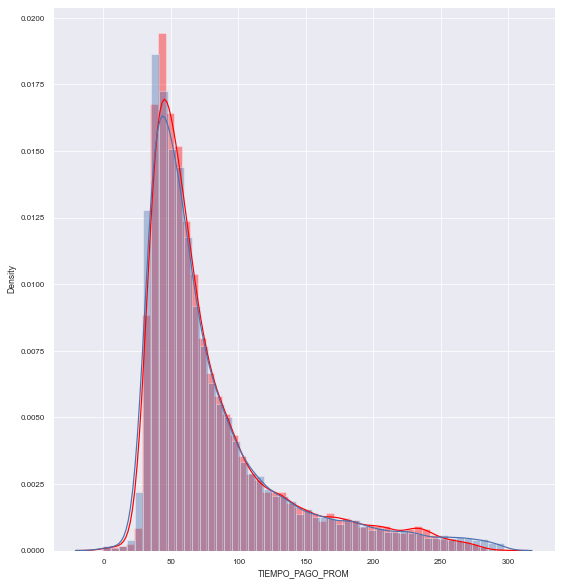

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))
sns.distplot(predicciones_xg_activa, color ='red', label = 'Valor Predicho')
sns.distplot(y_test_xg1, label = 'Valor Actual')

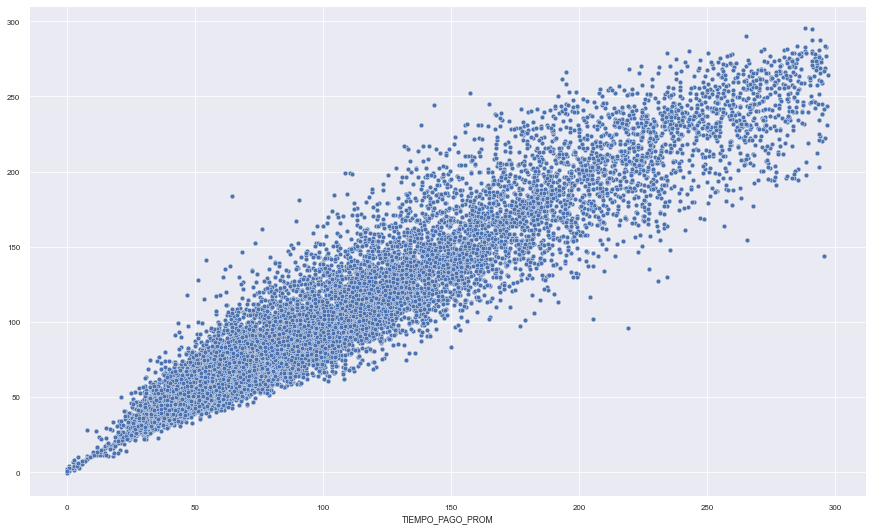

In [ ]:
fig, ax = plt.subplots(figsize = (15, 9))
sns.scatterplot(x = y_test_xg1, y= predicciones_xg_activa, legend="full")

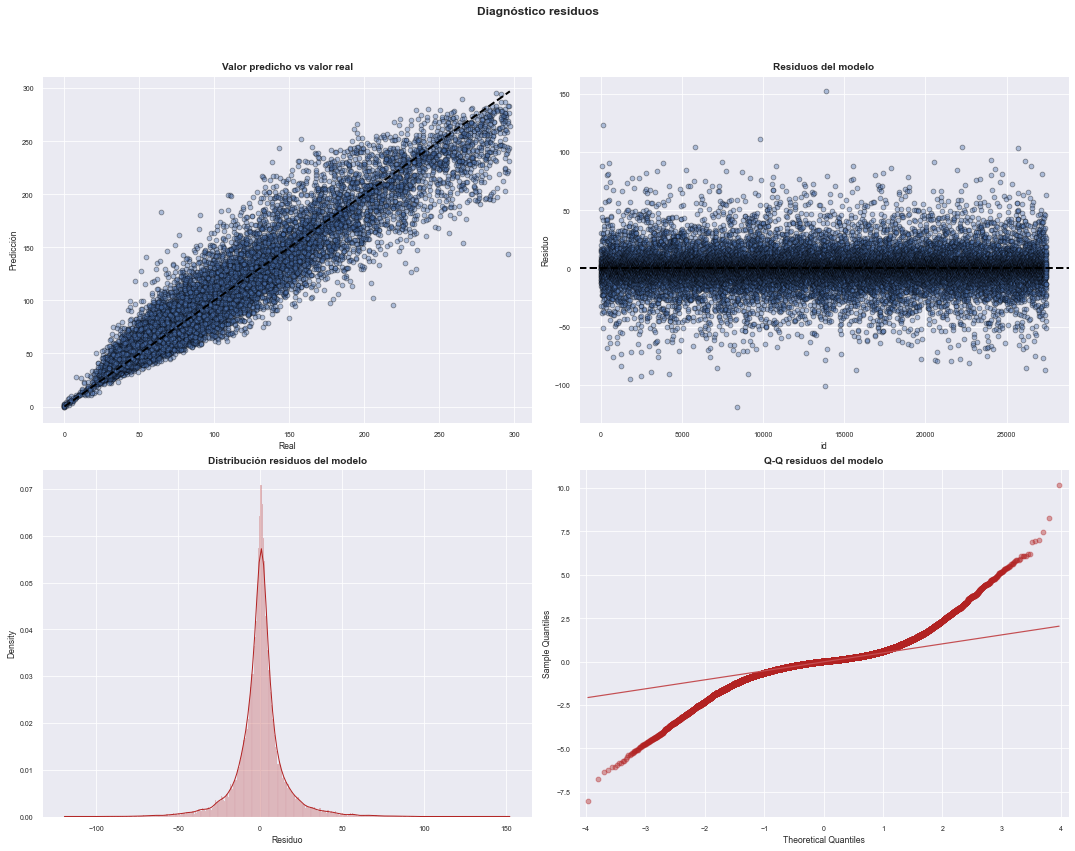

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

axes[0, 0].scatter(y_test_xg1, predicciones_xg_activa, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test_xg1.min(), y_test_xg1.max()], [y_test_xg1.min(), y_test_xg1.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test_xg1))), y_test_xg1 - predicciones_xg_activa,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_test_xg1 - predicciones_xg_activa,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_test_xg1 - predicciones_xg_activa,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
df_predicciones1 = pd.DataFrame({'Tiempo_PAGO_REAL' : y_test_xg1, 'PREDICCION_PAGO' : predicciones_xg_activa})
df_predicciones1.head()

,Tiempo_PAGO_REAL,PREDICCION_PAGO
97241,226.500000,209.929947
49952,122.000000,91.649475
87689,58.000000,58.269714
23802,57.410736,72.806557
124198,58.941176,56.824585


In [ ]:
df_predicciones1.describe()

,Tiempo_PAGO_REAL,PREDICCION_PAGO
count,27441.000000,27441.000000
mean,79.918895,79.743233
std,53.328997,50.963631
min,0.000000,-0.758866
25%,44.185185,45.172581
50%,60.632928,61.305889
75%,94.500000,94.206360
max,297.000000,295.150055


## Comparativo de error modelos

In [ ]:
error_modelos = pd.DataFrame({
                        'modelo': ['gradient boosting',
                                   'xgboost'],
                        'rmse': [ rmse_gb, rmse_xg]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

## Ajuste Modelo Seleccionado XGBOOST a Train

In [ ]:
modelo_xg_activa.fit(X_train_xg1, y_train_xg1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xg_predict_final = icetex_modelo2.drop(columns=['TIEMPO_PAGO_PROM'])

In [ ]:
matriz_input_prej = icetex_modelo2

In [ ]:
matriz_input_prej[['FECHA_ULTIMO_PAGO','IDSOLICITUD']] = icetex_predict_out[['FECHAULTPAGO_y','IDSOLICITUD']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
matriz_input_prej.to_excel('C:/Users/elkcuepa/Documents/Proyecto Modelo ICETEX pREJUR/matriz_input_prej.xlsx', index = False, header=True)

# Pickle para Cargue de modelo XGBoost Cartera Activa

In [ ]:
import pickle
modelo_activa = 'modelo_xg_activa.pkl'
with open(modelo_activa, 'wb') as file:
    pickle.dump(modelo_xg_activa, file)

# Modelo xgboost Cartera Fondos

In [ ]:
from xgboost import XGBRegressor

## Modelo Inicial

In [ ]:
X_train_xg2, X_test_xg2, y_train_xg2, y_test_xg2 = train_test_split(
                                        icetex_matriz_fondos.drop(columns = "TIEMPO_PAGO_PROM"),
                                        icetex_matriz_fondos['TIEMPO_PAGO_PROM'],
                                        random_state = 123
                                    )
Estandar = StandardScaler()
Estandar.fit(X_train_xg2)

X_train_xg2 = Estandar.transform(X_train_xg2)
X_test_xg2 = Estandar.transform(X_test_xg2)

In [ ]:
X_train_xg2

array([[ 4.28626786,  0.82318807,  1.95131358, ...,  0.36209734,
         2.12641227,  0.28261823],
       [-0.42503283, -0.29681129, -0.36804285, ...,  0.36209734,
        -0.2854549 ,  0.28261823],
       [-0.25054021, -0.29681129, -0.21266034, ..., -3.3041585 ,
         1.73643877, -0.0933048 ],
       ...,
       [-0.42503283, -0.29681129, -0.20147186, ...,  0.36209734,
        -0.2854549 ,  0.28261823],
       [-0.42503283, -0.29681129, -0.3199023 , ...,  0.36209734,
        -0.2854549 ,  0.28261823],
       [ 0.36018395,  1.13275967,  1.52817125, ...,  0.36209734,
        -0.2854549 ,  0.28261823]])

In [ ]:
X_train2 = pd.DataFrame(X_train_xg2)
y_train2 = pd.DataFrame(y_train_xg2)

## Evaluación Hiperparámetros por GridSearch

In [ ]:

param_grid = {'max_depth'        : [None, 1, 3, 5, 10],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'booster'          : ['gbtree']
             }

np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train_xg2.shape[0],
                    size= int(X_train_xg2.shape[0]*0.1),
                    replace=False
                 )

X_val2 = X_train2.iloc[idx_validacion, :].copy()
y_val2 = y_train2.iloc[idx_validacion].copy()

X_train_grid2 = X_train2.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid2 = y_train2.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X_val2, y_val2)],
              "verbose"               : 0
             }


grid2 = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 400,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid2.fit(X = X_train_grid2, y = y_train_grid2, **fit_params)


resultados = pd.DataFrame(grid2.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
28,gbtree,0.1,10,0.5,-6.719543,0.227775,-2.174482,0.624884
29,gbtree,0.1,10,1,-6.776355,0.241440,-0.623978,0.191109
21,gbtree,0.1,None,1,-6.902258,0.352344,-3.558274,0.930115
18,gbtree,0.01,10,0.5,-6.939026,0.193416,-3.714882,0.011026


In [ ]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'subsample': 1} : -15.316294501166354 neg_root_mean_squared_error
Número de árboles incluidos en el modelo: 400


## Error Modelo Final

In [ ]:
X_test2 = pd.DataFrame(X_test_xg2)

In [ ]:
modelo_xg_fondos = grid2.best_estimator_
predicciones_xg_fondos = modelo_xg_fondos.predict(X_test_xg2)
rmse_xg2 = mean_squared_error(
        y_true  = y_test_xg2,
        y_pred  = predicciones_xg_fondos,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_xg2}")

El error (rmse) de test es: 5.969622663914601


In [ ]:
errors = abs(predicciones_xg_fondos - y_test_xg2)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors/y_test_xg2)
accuracy = 100 - (mape.median())
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.37 degrees.
Accuracy: 99.04 %.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


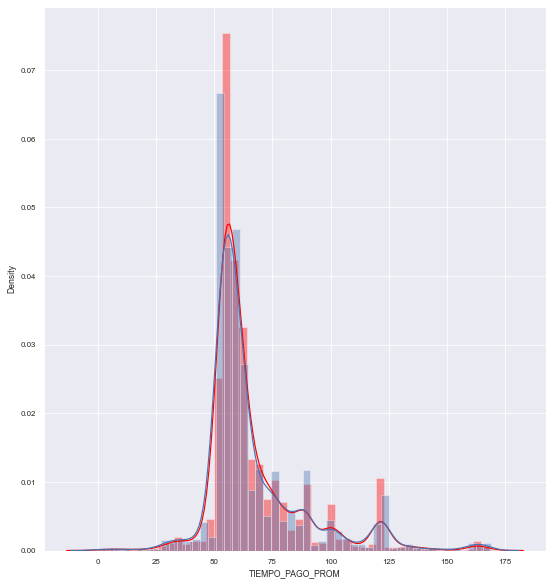

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))
sns.distplot(predicciones_xg_fondos, color ='red', label = 'Valor Predicho')
sns.distplot(y_test_xg2, label = 'Valor Actual')

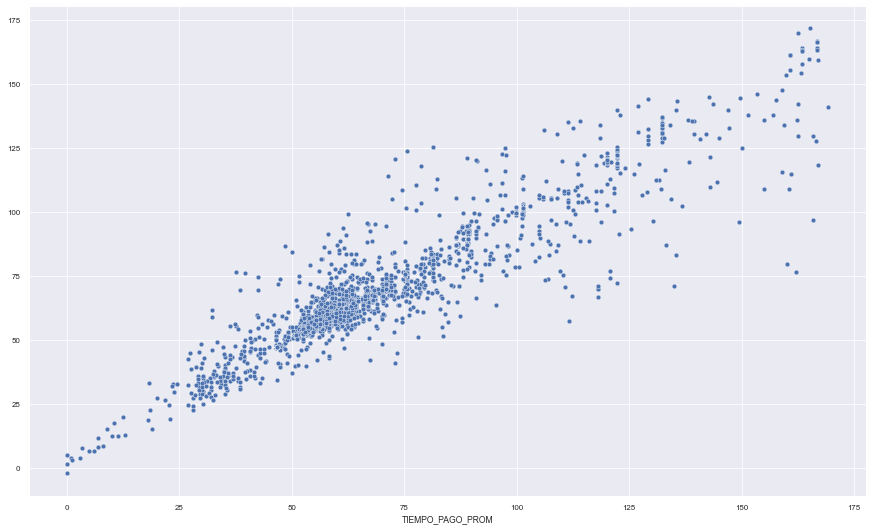

In [ ]:
fig, ax = plt.subplots(figsize = (15, 9))
sns.scatterplot(x = y_test_xg2, y= predicciones_xg_fondos, legend="full")

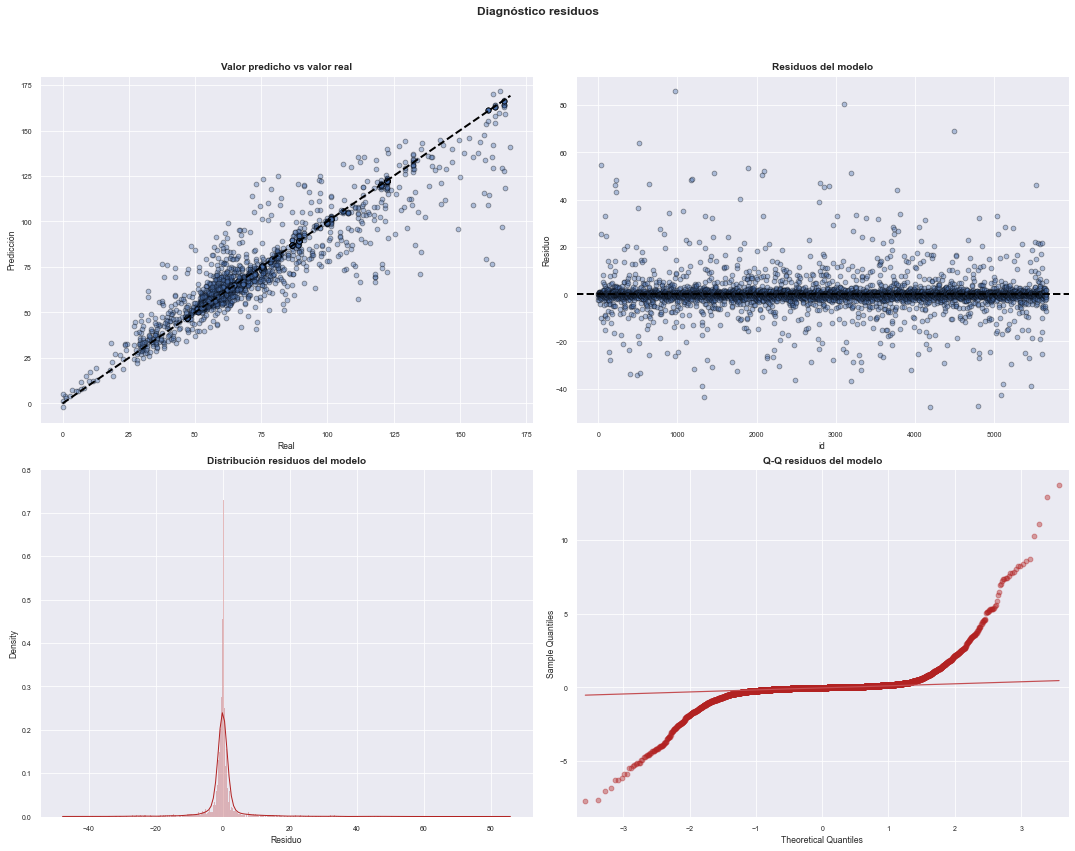

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

axes[0, 0].scatter(y_test_xg2, predicciones_xg_fondos, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test_xg2.min(), y_test_xg2.max()], [y_test_xg2.min(), y_test_xg2.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test_xg2))), y_test_xg2 - predicciones_xg_fondos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_test_xg2 - predicciones_xg_fondos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_test_xg2 - predicciones_xg_fondos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
df_predicciones2 = pd.DataFrame({'Tiempo_PAGO_REAL' : y_test_xg2, 'PREDICCION_PAGO' : predicciones_xg_fondos})
df_predicciones2.head()

,Tiempo_PAGO_REAL,PREDICCION_PAGO
57708,52.419827,52.226734
62417,89.219827,89.150543
58217,52.905541,55.183388
70520,53.211131,54.389996
61101,64.419827,63.814896


In [ ]:
df_predicciones2.describe()

,Tiempo_PAGO_REAL,PREDICCION_PAGO
count,5655.000000,5655.000000
mean,66.782729,66.730904
std,22.329486,21.219975
min,0.000000,-2.170011
25%,53.896750,54.275036
50%,59.219827,59.400257
75%,72.169827,70.991085
max,169.133333,171.538818


## Comparativo de error modelos

In [ ]:
error_modelos = pd.DataFrame({
                        'modelo': ['gradient boosting',
                                   'xgboost'],
                        'rmse': [ rmse_gb, rmse_xg]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

## Ajuste Modelo Seleccionado XGBOOST a Train

In [ ]:
modelo_xg_fondos.fit(X_train_xg2, y_train_xg2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xg_predict_final = icetex_modelo2.drop(columns=['TIEMPO_PAGO_PROM'])

## Matriz Input Modelo

In [ ]:
matriz_input_prej = icetex_predict_PCA[['NROCUOTASMORA', 'VALORCUOTA',  'SALDOINICIAAMORT', 'SALDOCAPITALACIERRE',
                           'CAPITALICETEX_ACT','TIEMPO_PAGO_MAX', 'No. ACUERDOS DE PAGO', 'VALOR_RECAUDO_PROM', 'VALOR_RECAUDO_MAX',
                           'TIEMPO_PAGO_PROM', 'DIA_FREQ_PAG', 'MES_FREQ_PAG', 'NUM_PAGOS_HIST',
                            'SALDO_MORA_TOTAL_ACTUAL','SALDO_TOTAL_ACTUAL',
                            'MES_FREQ_SALIDA','EDAD','DIA_ULT_PAGO','LINEA']]

In [ ]:
matriz_input_prej[['FECHA_ULTIMO_PAGO','IDSOLICITUD']] = icetex_predict_PCA[['FECHAULTPAGO_y','IDSOLICITUD']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
matriz_input_prej.to_excel('C:/Users/elkcuepa/Documents/Proyecto Modelo ICETEX pREJUR/matriz_input_prej.xlsx', index = False, header=True)

# Pickle para Cargue de modelo XGBoost Cartera Fondos

In [ ]:
import pickle
modelo_fondos = 'modelo_xg_fondos.pkl'
with open(modelo_fondos, 'wb') as file:
    pickle.dump(modelo_xg_fondos, file)

# Implementación Modelo XGBoost Cartera Activa-Fondos



In [ ]:
df_updated = pd.read_excel('C:/Users/elkcuepa/Documents/Proyecto Modelo ICETEX pREJUR/matriz_input_prej.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [ ]:
modelo_xg_activa = 'C:/Users/elkcuepa/modelo_xg_activa.pkl'
modelo_xg_fondos = 'C:/Users/elkcuepa/modelo_xg_fondos.pkl'

In [ ]:
activa = df_updated['LINEA'] == 'LINEA_ACTIVA'
fondos = df_updated['LINEA'] == 'FONDOS'
icetex_prej_activa = df_updated[activa]
icetex_prej_fondos = df_updated[fondos]
icetex_prej_activa = icetex_prej_activa.drop(columns='LINEA')
icetex_prej_fondos = icetex_prej_fondos.drop(columns='LINEA')

In [ ]:
predict_final_activa = icetex_prej_activa.iloc[:, 0:18]
predict_final_fondos = icetex_prej_fondos.iloc[:, 0:18]

In [ ]:
predict_final_activa= predict_final_activa.drop(columns='TIEMPO_PAGO_PROM')
predict_final_fondos= predict_final_fondos.drop(columns='TIEMPO_PAGO_PROM')

In [ ]:
predict_final_activa

array([[-0.20539571, -0.03263777,  1.14440509, ..., -0.81996755,
         0.85864641, -0.88480796],
       [ 0.46767574, -0.41932936,  1.25930304, ..., -0.50682171,
         1.00969262, -1.08786865],
       [-0.20539571,  0.17965974,  1.58871769, ..., -0.81996755,
         1.00969262,  0.53661685],
       ...,
       [-0.20539571, -0.26439811, -0.83038348, ...,  1.05890745,
        -1.25600053,  1.45038994],
       [-0.20539571,  1.18825244, -0.83038348, ...,  1.05890745,
        -0.19867706,  0.73967754],
       [-0.54193144,  1.53114875, -0.83038348, ...,  1.05890745,
        -0.95390811,  1.45038994]])

In [ ]:
Estandar = StandardScaler()
predict_final_activa= Estandar.fit_transform(predict_final_activa)
predict_final1 = pd.DataFrame(predict_final_activa)
predict_final_fondos= Estandar.fit_transform(predict_final_fondos)
predict_final2 = pd.DataFrame(predict_final_fondos)

In [ ]:
with open(modelo_activa, 'rb') as file:
    modelo_xg_activa = pickle.load(file)

In [ ]:
with open(modelo_fondos, 'rb') as file:
    modelo_xg_fondos = pickle.load(file)

In [ ]:
icetex_prej_activa['TIEMPO_PROXIMO_PAGO'] = modelo_xg_activa.predict(predict_final_activa)
icetex_prej_fondos['TIEMPO_PROXIMO_PAGO'] = modelo_xg_fondos.predict(predict_final_fondos)

In [ ]:
df2_all = [icetex_prej_activa, icetex_prej_fondos]
df_updated = pd.concat(df2_all, axis=0)

In [ ]:
df_updated

,NROCUOTASMORA,VALORCUOTA,SALDOINICIAAMORT,SALDOCAPITALACIERRE,CAPITALICETEX_ACT,TIEMPO_PAGO_MAX,No. ACUERDOS DE PAGO,VALOR_RECAUDO_PROM,VALOR_RECAUDO_MAX,TIEMPO_PAGO_PROM,...,MES_FREQ_PAG,NUM_PAGOS_HIST,SALDO_MORA_TOTAL_ACTUAL,SALDO_TOTAL_ACTUAL,MES_FREQ_SALIDA,EDAD,DIA_ULT_PAGO,FECHA_ULTIMO_PAGO,IDSOLICITUD,TIEMPO_PROXIMO_PAGO
0,3.0,248112.00,24689007.00,7810639.00,7810638.88,155.0,2,2.291361e+05,1000000.0,25.473684,...,2.0,39.0,1012270.0,8783947.0,4,34.0,7,2019-10-07,13,34.572407
1,5.0,124790.00,26125472.77,10838633.17,10644320.14,194.0,1,1.608809e+05,321000.0,40.760000,...,3.0,26.0,952510.0,11066293.0,5,35.0,5,2020-04-05,33,45.757542
2,3.0,315817.00,30243848.09,9154011.67,9154011.67,283.0,5,6.182182e+05,1420271.0,90.090909,...,4.0,12.0,2982924.0,10021315.0,4,35.0,21,2019-12-21,180,95.858757
3,5.0,364407.00,40708635.00,13400215.00,11647451.77,184.0,6,1.237937e+06,2985994.0,85.153846,...,3.0,14.0,1485427.0,13610333.0,10,36.0,19,2020-03-19,209,78.298584
4,3.0,595971.00,64120343.75,45763167.32,45763167.32,113.0,8,4.658957e+05,1100423.0,43.647059,...,11.0,18.0,6178945.0,53406748.0,10,35.0,3,2020-05-03,281,45.650730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131991,5.0,294085.00,10000000.00,10000000.00,8547141.68,95.0,1,1.086488e+06,1672977.0,95.000000,...,8.0,2.0,901740.0,10142371.0,10,24.0,13,2020-11-13,3887250,56.417110
132458,3.0,207927.00,2445300.00,2245757.00,2051044.08,138.0,0,2.594815e+05,400000.0,61.666667,...,4.0,4.0,847096.0,2285527.0,10,20.0,13,2020-10-13,3898233,56.772850
134642,3.0,268783.49,3161000.00,2642750.00,2642750.00,94.0,0,2.743915e+05,280000.0,94.000000,...,2.0,2.0,1952843.0,2755456.0,10,20.0,28,2020-05-28,3945958,65.644753
134992,2.0,141822.00,1603069.00,952265.61,952265.61,215.0,3,3.666667e+05,400000.0,121.500000,...,2.0,3.0,611688.0,611688.0,2,18.0,17,2020-10-17,3952598,96.773407


In [ ]:
errors = abs(icetex_prej_fondos['TIEMPO_PROXIMO_PAGO'] - icetex_prej_fondos['TIEMPO_PAGO_PROM'])
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors/icetex_prej_fondos['TIEMPO_PAGO_PROM'])
accuracy = 100 - (mape.median())
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 13.05 degrees.
Accuracy: 91.76 %.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


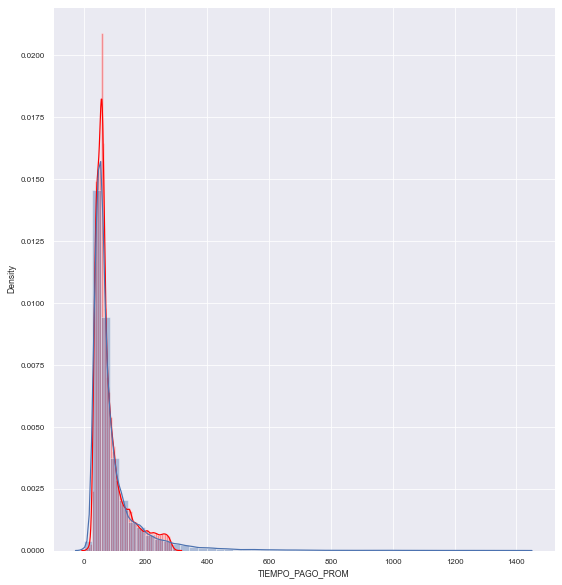

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))
sns.distplot(df_updated['TIEMPO_PROXIMO_PAGO'], color ='red', label = 'Valor Predicho')
sns.distplot(df_updated['TIEMPO_PAGO_PROM'], label = 'Valor Actual')

In [ ]:
temp = df_updated['TIEMPO_PROXIMO_PAGO'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

In [ ]:
df_updated['FECHA_PROXIMO_PAGO'] = df_updated['FECHA_ULTIMO_PAGO'] + temp

In [ ]:
IDSOLICITUD = df_updated['IDSOLICITUD']
df_updated.drop(labels=['IDSOLICITUD'], axis=1,inplace = True)
df_updated.insert(0, 'IDSOLICITUD', IDSOLICITUD)

In [ ]:
df_updated.head(60)

,IDSOLICITUD,NROCUOTASMORA,VALORCUOTA,SALDOINICIAAMORT,SALDOCAPITALACIERRE,CAPITALICETEX_ACT,TIEMPO_PAGO_MAX,No. ACUERDOS DE PAGO,VALOR_RECAUDO_PROM,VALOR_RECAUDO_MAX,...,MES_FREQ_PAG,NUM_PAGOS_HIST,SALDO_MORA_TOTAL_ACTUAL,SALDO_TOTAL_ACTUAL,MES_FREQ_SALIDA,EDAD,DIA_ULT_PAGO,FECHA_ULTIMO_PAGO,TIEMPO_PROXIMO_PAGO,FECHA_PROXIMO_PAGO
0,13,3.0,248112.00,2.468901e+07,7.810639e+06,7.810639e+06,155.0,2,2.291361e+05,1000000.0,...,2.0,39.0,1012270.0,8783947.0,4,34.0,7,2019-10-07,34.572407,2019-11-11
1,33,5.0,124790.00,2.612547e+07,1.083863e+07,1.064432e+07,194.0,1,1.608809e+05,321000.0,...,3.0,26.0,952510.0,11066293.0,5,35.0,5,2020-04-05,45.757542,2020-05-21
2,180,3.0,315817.00,3.024385e+07,9.154012e+06,9.154012e+06,283.0,5,6.182182e+05,1420271.0,...,4.0,12.0,2982924.0,10021315.0,4,35.0,21,2019-12-21,95.858757,2020-03-26
3,209,5.0,364407.00,4.070864e+07,1.340022e+07,1.164745e+07,184.0,6,1.237937e+06,2985994.0,...,3.0,14.0,1485427.0,13610333.0,10,36.0,19,2020-03-19,78.298584,2020-06-06
4,281,3.0,595971.00,6.412034e+07,4.576317e+07,4.576317e+07,113.0,8,4.658957e+05,1100423.0,...,11.0,18.0,6178945.0,53406748.0,10,35.0,3,2020-05-03,45.650730,2020-06-18
5,288,15.0,184374.00,2.348067e+07,4.624036e+06,4.126089e+06,618.0,2,8.251855e+05,2411484.0,...,1.0,8.0,2294506.0,4838282.0,2,33.0,27,2020-11-27,145.798660,2021-04-22
6,443,2.0,81194.00,8.625294e+06,2.173780e+06,2.173780e+06,265.0,6,3.732620e+05,650000.0,...,1.0,9.0,769466.0,2268530.0,1,36.0,1,2020-08-01,110.548370,2020-11-20
7,546,8.0,149345.00,1.513065e+07,5.548246e+06,5.198246e+06,111.0,1,1.880220e+05,350000.0,...,11.0,33.0,568230.0,5789646.0,10,35.0,11,2020-06-11,38.875801,2020-07-20
8,567,3.0,169410.79,1.707217e+07,2.157291e+06,2.157291e+06,208.0,0,2.456812e+05,585494.0,...,1.0,26.0,1805690.0,2312931.0,10,37.0,1,2020-03-01,45.939396,2020-04-16
9,725,7.0,139680.00,9.325685e+06,1.757042e+06,1.139961e+06,266.0,2,2.637816e+05,800000.0,...,11.0,15.0,504169.0,1847112.0,3,37.0,1,2020-08-01,76.675880,2020-10-17


In [ ]:
df_updated.to_excel('C:/Users/elkcuepa/Documents/Proyecto Modelo ICETEX pREJUR/matriz_output_prej.xlsx', index = False, header=True)